**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

**Data exploration**

In [2]:
depressed_BDI_Sen = pd.read_csv("datasets/Depressed-Found-BDI-Sen-Users-Genders.csv")

In [3]:
train = pd.read_csv("datasets/train-with-severities-and-multilabels.csv")
val = pd.read_csv("datasets/val-with-severities-and-multilabels.csv")
test = pd.read_csv("datasets/test-with-severities-and-multilabels.csv")

In [4]:
len(depressed_BDI_Sen)

549

In [5]:
depressed_BDI_Sen.head()

,Sentence,Label,Severity,Sadness,Pessimism,Sense_of_failure,Loss_of_Pleasure,Guilty_feelings,Sense_of_punishment,Self-dislike,...,Feelings_of_worthlessness,Loss_of_energy,Change_of_sleep,Irritability,Changes_in_appetite,Concentration_difficulty,Tiredness_or_fatigue,Loss_of_interest_in_sex,Subject,Gender
0,I just cant say anything to her because I dont...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Subject 1272,0
1,Im saying I want to die,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Subject 1272,0
2,I found someone I love and truly want to be wi...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Subject 1272,0
3,Never have I ever had suicidal thoughts.,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Subject 1272,0
4,Youll cry yourself to sleep,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Subject 1272,0


In [6]:
#counts of sentences per user

unique_subjects = depressed_BDI_Sen['Subject'].unique()
counts = []
names = []

for value in unique_subjects:
    names.append(value)
    counts.append(len(depressed_BDI_Sen[depressed_BDI_Sen['Subject'] == value]))

for i in range(len(counts)):
    print(f"Number of sentences from {names[i]}: {counts[i]}")

Number of sentences from Subject 1272: 5
Number of sentences from Subject 2341: 19
Number of sentences from Subject 2432: 15
Number of sentences from Subject 2827: 133
Number of sentences from Subject 3707: 93
Number of sentences from Subject 2903: 10
Number of sentences from Subject 9218: 17
Number of sentences from Subject 2961: 37
Number of sentences from Subject 9798: 18
Number of sentences from Subject 3993: 44
Number of sentences from Subject 4058: 9
Number of sentences from Subject 436.: 2
Number of sentences from Subject 5791: 16
Number of sentences from Subject 5897: 2
Number of sentences from Subject 6619: 17
Number of sentences from Subject 6635: 33
Number of sentences from Subject 9694: 15
Number of sentences from Subject 6900: 24
Number of sentences from Subject 7039: 26
Number of sentences from Subject 9454: 14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


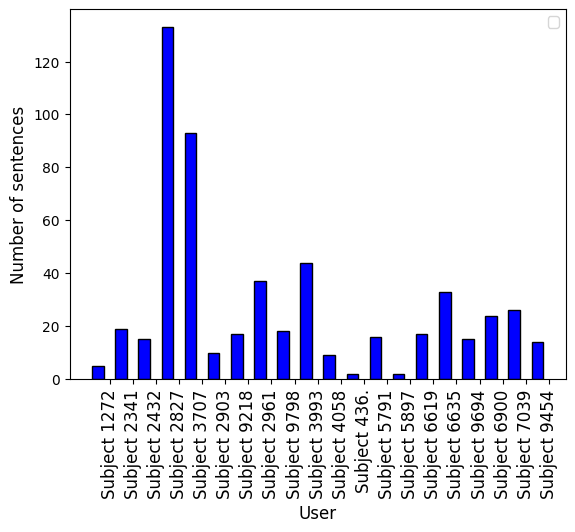

In [7]:
r= np.arange(20)
width = 0.5
        
bar = plt.bar(r, counts, color='b', width = width, edgecolor = 'black')
  
plt.xlabel("User", fontsize=12) 
plt.ylabel("Number of sentences", fontsize=12) 
#plt.title("Distribution of sentences over users", fontweight="bold") 
  
plt.xticks(r + width,names, rotation=90, fontsize=12) 
plt.legend() 
      
plt.show() 

In [8]:
#number of sentences per gender

unique_genders = depressed_BDI_Sen['Gender'].unique()
counts = {}

for value in unique_genders:
    counts[value] = len(depressed_BDI_Sen[depressed_BDI_Sen['Gender'] == value])

for value, count in counts.items():
    print(f"Number of sentences where gender is {value}: {count}")

Number of sentences where gender is 0: 212
Number of sentences where gender is 1: 337


In [9]:
#check if some sentences appear multiple times - none!
unique_sentences = depressed_BDI_Sen['Sentence'].unique()
counts = {}

for value in unique_sentences:
    counts[value] = len(depressed_BDI_Sen[depressed_BDI_Sen['Subject'] == value])

for value, count in counts.items():
    if count > 0:
        print(f"This sentence appears multiple times: {value}, appearing {count} times.")

In [12]:
#counts of sentences per severity level

unique_severity = depressed_BDI_Sen['Severity'].unique()
counts = {}
counts = []
names = []

for value in unique_severity:
    names.append(value)
    counts.append(len(depressed_BDI_Sen[depressed_BDI_Sen['Severity'] == value])) 

for i in range(len(counts)):
    print(f"Number of sentences for Severity Value {names[i]}: {counts[i]}")

Number of sentences for Severity Value 1: 237
Number of sentences for Severity Value 3: 93
Number of sentences for Severity Value 2: 105
Number of sentences for Severity Value 0: 113
Number of sentences for Severity Value 4: 1


In [11]:
depressed_BDI_Sen[depressed_BDI_Sen["Label"] == 0]

,Sentence,Label,Severity,Sadness,Pessimism,Sense_of_failure,Loss_of_Pleasure,Guilty_feelings,Sense_of_punishment,Self-dislike,...,Feelings_of_worthlessness,Loss_of_energy,Change_of_sleep,Irritability,Changes_in_appetite,Concentration_difficulty,Tiredness_or_fatigue,Loss_of_interest_in_sex,Subject,Gender


**Data Exploration - Symptoms and gender**

In [ ]:
#gender distribution per symptom on a sentence level

male_pos_perc = []
male_neg_perc = []
fem_pos_perc = []
fem_neg_perc = []
symp_names = []
male_pos_counts = []
male_neg_counts = []
fem_pos_counts = []
fem_neg_counts = []

for name in depressed_BDI_Sen.columns[3:24]:
    symp_names.append(name)
    male_pos_count = ((depressed_BDI_Sen['Gender'] == 0) & (depressed_BDI_Sen[name] == 1)).sum()
    male_neg_count = ((depressed_BDI_Sen['Gender'] == 0) & (depressed_BDI_Sen[name] == 0)).sum()
    fem_pos_count = ((depressed_BDI_Sen['Gender'] == 1) & (depressed_BDI_Sen[name] == 1)).sum()
    fem_neg_count = ((depressed_BDI_Sen['Gender'] == 1) & (depressed_BDI_Sen[name] == 0)).sum()
    male_pos_counts.append(male_pos_count)
    male_neg_counts.append(male_neg_count)
    fem_pos_counts.append(fem_pos_count)
    fem_neg_counts.append(fem_neg_count)
    print("Male Pos Count for ", name, ": ", male_pos_count)
    print("Male Neg Count for ", name, ": ", male_neg_count)
    print("Female Pos Count for ", name, ": ", fem_pos_count)
    print("Female Neg Count for ", name, ": ", fem_neg_count)
    #labels = 'Male Pos', 'Male Neg', 'Female Pos', 'Female Neg'
    male = male_pos_count+male_neg_count
    fem = fem_pos_count+fem_neg_count
    male_pos_perc.append(male_pos_count/male)
    male_neg_perc.append(male_neg_count/male)
    fem_pos_perc.append(fem_pos_count/fem)
    fem_neg_perc.append(fem_neg_count/fem)

r= np.arange(21)
width = 0.4
        
bar1 = plt.bar(r, male_pos_perc, color='b', width = width, edgecolor = 'black', label = "Male Pos")
bar3 = plt.bar(r+width, fem_pos_perc, color = 'g', width = width, edgecolor = 'black', label = "Female Pos")
  
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Symptom", fontsize=15) 
plt.ylabel("Proportion with symptom", fontsize=15) 
#plt.title("Gender distributions per symptom (Sentence level)") 
   
plt.xticks(r + width/2,symp_names, rotation=90, fontsize=15) 
plt.yticks(fontsize=15)
plt.legend(fontsize=15) 
      
plt.show() 

In [ ]:
#gender distribution per symptom on a user level

male_pos_perc = []
male_neg_perc = []
fem_pos_perc = []
fem_neg_perc = []
symp_names = []

male = []
fem = []

for user in unique_subjects:
    symp = []
    user_df = depressed_BDI_Sen[depressed_BDI_Sen['Subject'] == user]
    #print(user_df)
    for name in depressed_BDI_Sen.columns[3:24]:
        if (user_df[name]==1).any():
            symp.append(name)   
    if user_df['Gender'].unique()==0:
        male.append(symp)
    else:
        fem.append(symp)

for name in depressed_BDI_Sen.columns[3:24]:
    symp_names.append(name)
    male_pos_count = sum(sublist.count(name) for sublist in male)
    male_neg_count = 11-male_pos_count
    fem_pos_count = sum(sublist.count(name) for sublist in fem)
    fem_neg_count = 9-fem_pos_count
    print("Male Pos Count for ", name, ": ", male_pos_count)
    print("Male Neg Count for ", name, ": ", male_neg_count)
    print("Female Pos Count for ", name, ": ", fem_pos_count)
    print("Female Neg Count for ", name, ": ", fem_neg_count)
    #labels = 'Male Pos', 'Male Neg', 'Female Pos', 'Female Neg'
    male_sum = male_pos_count+male_neg_count
    fem_sum = fem_pos_count+fem_neg_count
    male_pos_perc.append(male_pos_count/male_sum)
    male_neg_perc.append(male_neg_count/male_sum)
    fem_pos_perc.append(fem_pos_count/fem_sum)
    fem_neg_perc.append(fem_neg_count/fem_sum)


r= np.arange(21)
width = 0.4
        
bar1 = plt.bar(r, male_pos_perc, color='b', width = width, edgecolor = 'black', label = "Male Pos")
bar3 = plt.bar(r+width, fem_pos_perc, color = 'g', width = width, edgecolor = 'black', label = "Female Pos")
  
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Symptom", fontsize=15) 
plt.ylabel("Proportion with symptom", fontsize=15) 
#plt.title("Gender distributions per symptom (User level)") 
   
plt.xticks(r + width/2,symp_names, rotation=90, fontsize=15) 
plt.yticks(fontsize=15)
plt.legend(fontsize=15) 
      
plt.show() 

**P-values for gender differences on sentence level**

In [ ]:
#if there are 17 cells with values less than 5 -> fishers exact test

less_than_5 = 0

for value in male_pos_counts:
    if value < 5:
        less_than_5 += 1
for value in male_neg_counts:
    if value < 5:
        less_than_5 += 1
        
for value in fem_pos_counts:
    if value < 5:
        less_than_5 += 1

for value in fem_neg_counts:
    if value < 5:
        less_than_5 += 1

less_than_5

#-> chi square

In [ ]:
# defining the table
p_values = []
for i in range(len(male_pos_counts)):
    data = [[male_pos_counts[i], male_neg_counts[i]], [fem_pos_counts[i], fem_neg_counts[i]]]
    print(data)
    stat, p, dof, expected = chi2_contingency(data)
    p_values.append(p)
 
    # interpret p-value
    alpha = 0.05
    print(depressed_BDI_Sen.columns[i+3])
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
        print('Observed pos proportion male: ', male_pos_counts[i]/212)
        print('Observed pos proportion female: ', fem_pos_counts[i]/337)
        print('Expected: ', expected)
        print('Expected pos proportion male: ', expected[0][0]/212)
        print('Expected pos proportion female: ', expected [1][0]/337)
    else:
        print('Independent (H0 holds true)')
    print("\n")

In [ ]:
p_value_df = pd.DataFrame([p_values], columns=[name for name in depressed_BDI_Sen.columns[3:24]])

p_value_df